## Loading the dataset

In [43]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [44]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1QxkppL24m9TAT5Ix5AjJBvlK-6sfeN0V' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

# Tweet Preprocessor

In [45]:
!pip install tweet-preprocessor


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import seaborn as sns

In [47]:
df = pd.read_csv('tweet_data.csv',lineterminator='\n')

In [48]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2021-11-02 23:59:54+00:00,1455686133095014405,@nypost @ARISEtv @UN @USUN @APCUKingdom @congressdotgov @POTUS @usairforce @USMAN84kg https://t.co/UakdFd1RgP,Onome44142279,0,Onome,und
1,1,2021-11-02 23:59:40+00:00,1455686076031541249,"@calxandr @UN From\n1. Legal Encroachment of minority rights in the form of #blasphemylaw to\n2. Bengali, Hazara and Baloch genocide to\n3. Land grabbing in the garb of Tribals (1946,2021) to\n4. Harbouring LeT,JeM,JuDawa,LeJ, Haqqani etc to\n5. Sheltering Laden - what else r u waiting for @UN ?",kumaram_007,0,कुमारम,en
2,2,2021-11-02 23:59:32+00:00,1455686040782458880,Tigrayan’s are being rounded up and taken to concentration camps. \n\n@EU_Commission @StateDept @SecBlinken @JosepBorrellF @UN @amnesty @hrw @KenRoth @GerrySimpsonHRW https://t.co/Z0kj64XD1G,YonasFrena,0,Yonas,en
3,3,2021-11-02 23:59:23+00:00,1455686004287971328,Elon Musk Trolls The United Nations HARD On Twitter!!! LOL. Good Watch. https://t.co/Caj0dWfWAt via @FacebookWatch,josephdepace3,0,joseph de pace,en
4,4,2021-11-02 23:59:04+00:00,1455685923094638598,@Iheannadi @ChifeDr @MBuhari @POTUS @StateDept @BernieSanders @LeaderMcConnell @chuckschumer @UN @SenBooker @Gladwell @CNN @ZainAsher It couldn’t have been said any better…,EHIJATOR_,0,Investor Jator,en
...,...,...,...,...,...,...,...,...
99996,99996,2021-10-25 11:29:58+00:00,1452598303678291972,Konnichiwa 👋🇯🇵⛩️ #Japan #UnitedNations #Kindergarten https://t.co/0fmjaIbbzm,sairajanaira,1,Ariana J. Arias-Descartin,pl
99997,99997,2021-10-25 11:29:51+00:00,1452598273496256516,@DavidGr45580373 @EU_Commission @EU @UN @state @IntlCrimCourt @EUCouncil The illegitimate president of Uganda is really tired however much some of the super powers try to support him. He has violated human rights etc but no action has been taken. #UgandaIsBleeding #VisitUganda @IMFNews @WorldBank @guardiannews https://t.co/TiGq3ej5Yp,RogerKatengo,2,MuvemuAkatengo,en
99998,99998,2021-10-25 11:29:46+00:00,1452598253715742723,"@albertartine @SpokespersonCHN I hope to see the representatives of Europe and America in the United Nations, no longer the lackey of capitalists, but the simple and amiable representatives of the interests of the vast working and peasant class, and to hell with ""liberal democracy, natural human rights""",kyoyuuchou,0,京右町,en
99999,99999,2021-10-25 11:29:40+00:00,1452598230840135685,"@DavidGr45580373 @EU_Commission @EU @UN @state @IntlCrimCourt @EUCouncil No one is safe in this current Ugandan regime. What did the dog do to deserve such a purnishment. Human right violations, animal violations the list goes on @UNHumanRights @StandUpUganda1 @guardiannews #StopFundingDictatorMuseveni #FreePoliticalPrisoners https://t.co/o9OtDtyFvS",RogerKatengo,0,MuvemuAkatengo,en


In [49]:
df = df[df["Language"] == "en"].drop(["Tweet Id","Unnamed: 0", "Language"], axis=1)

In [50]:
def clean_date(date_obj):
  for x in range(0, len(date_obj)):
    if date_obj[x] == " ":
      break
  date_obj = date_obj[:x]
  return date_obj

def preprocess_tweet(text):
    text = p.clean(text)
    return text


In [51]:
df["Datetime"] = df["Datetime"].apply(clean_date)
df['Clean Text'] = df['Text'].apply(preprocess_tweet)
df['Clean Text']= df['Clean Text'].str.replace('[^\w\s]','')

In [52]:
# Removing Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df['Clean Text']  = df['Clean Text'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop))

In [54]:
pd.set_option('display.max_colwidth', 400)
df.sample()

,Datetime,Text,Username,Like Count,Display Name,Clean Text
72251,2021-10-27,I think @UN is no more ''world organization'' for they are acting as thugs firing who they don't like &amp; hiring who will dance to their tune; what a shame! #TedrosResign #TplfTerroristGroup @JosepBorrellF @antonioguterres @UNGenva @UN @UNHCR https://t.co/slusfy49RP,ethiopi38038616,2,ethiopia,i think world organization acting thugs firing dont like amp hiring dance tune shame


In [55]:
from textblob import TextBlob
from wordcloud import WordCloud


In [56]:
df['TBScore'] = df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Convert polarity score into sentiment categories
df['Sentiment'] = df['TBScore'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text major ticklabel objects>)

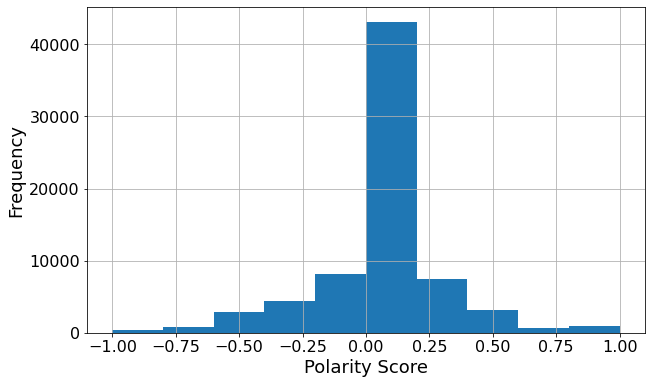

In [57]:
fig = plt.figure(figsize=(10, 6))
df['TBScore'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


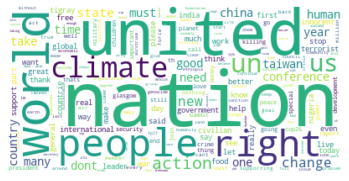

In [62]:
pos_tweets=df[df["Sentiment"]=="Positive"]
txt=" ".join(tweet for tweet in pos_tweets["Clean Text"])
stop_words = ["amp"] + list(STOPWORDS)
wordcloud = WordCloud(collocations = False,
                      background_color = 'white', stopwords = stop_words).generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

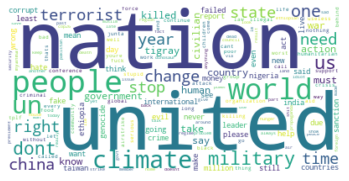

In [65]:
neg_tweets=df[df["Sentiment"]=="Negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["Clean Text"])

wordcloud = WordCloud(collocations = False,background_color = 'white',stopwords=stop_words).generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,15091,20.96
1,Neutral,33093,45.96
2,Positive,23825,33.09


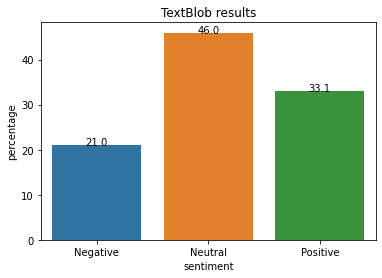

In [67]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('TextBlob results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

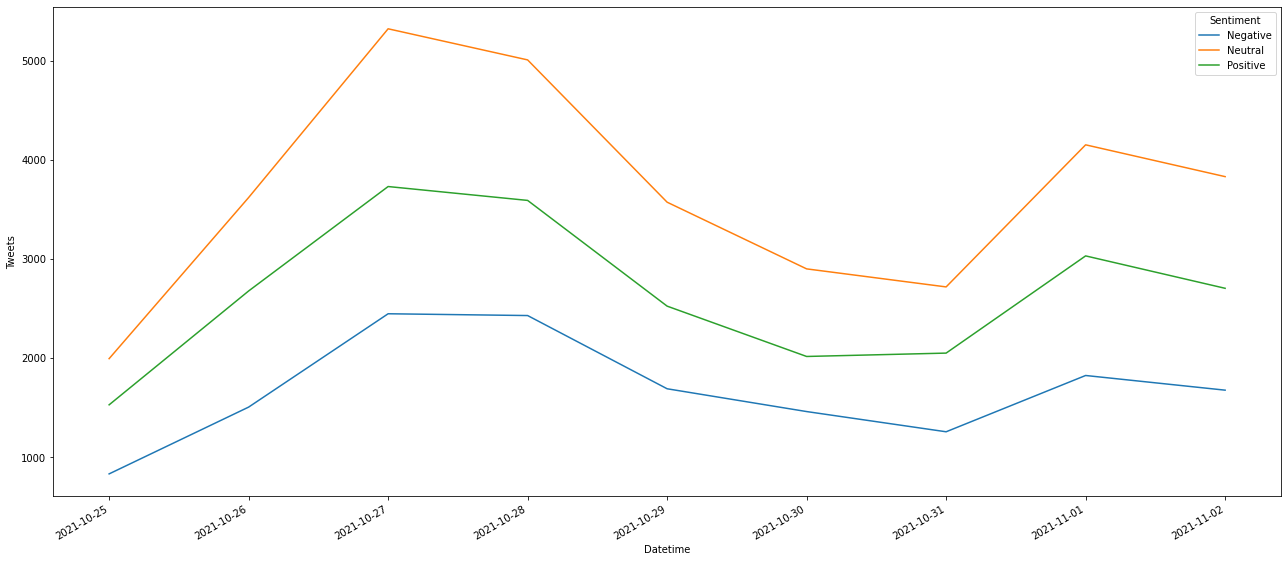

In [68]:
# Plotting timeseries plot
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()

In [69]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='TBScore', ascending=True)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)

,Text,TBScore,Username
0,And the world will not wake up to the evil of the UNITED NATIONS https://t.co/RK8BliPRXh,-1.0,melodiemorris
1,@CjnnamO @simon_ekpa United nations dominate with Muslims and they are all sycophants and hypocrisy Terrible people,-1.0,Collins53639212
2,@Raphael13654583 @simon_ekpa @UN @EU_Commission @10DowningStreet @IsraeliPM @JoeBiden @MarinSanna Do your worst,-1.0,fattylincorn001
3,@HermelaTV The @UN is an evil cabal they are not here to help whey are here to fulfill the depopulation agenda! https://t.co/HVS2sC9aIe please check this out!,-1.0,Tina71339738
4,@UN @UNDP God I wish the worst for the UN,-1.0,Antonio06146502
5,"@UN @IsraeliPM @DeptofDefense @StateDept @Europarl_EN @_AfricanUnion my question is what is the world doing is thire not leadership in this planet earth again this is evil against the people looking for there freedom i see the world is hypocrite, Nigeria against the Biafran's https://t.co/ASG1e2DerC",-1.0,celetinoha
6,@AgameAdiJeganu @AbiyAhmedAli @SecBlinken @UN @hrw @amnesty Why are you insulting his mum? She is not doing the bombing?,-1.0,MotherEritrea
7,The @UN's inaction has enabled @AbiyAhmedAli 's Ethiopian government to commit what's being called “the worst humanitarian crisis in the 21st century”. #UNStopFailingTigray https://t.co/qSSrfIoDHQ,-1.0,9cTpcnSznaLL1ch
8,@btselem Doesn't @UN @POTUS @JoeBiden react to the terrible atrocities?,-1.0,ramzeenazeez
9,The @UN's inaction has enabled @AbiyAhmedAli 's Ethiopian government to commit what's being called “the worst humanitarian crisis in the 21st century”. #UNStopFailingTigray https://t.co/qSSrfIoDHQ,-1.0,9cTpcnSznaLL1ch


In [70]:
df.sort_values(by='TBScore', ascending=False)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)


,Text,TBScore,Username
0,"@daddyhope @Spice08998353 @UN @AlenaDouhan They think we are fools,we might be suffering but,we have the best minds zvakaoma kudaro,chapedzera chibaba",1.0,Robbiemuti
1,@wawiranjiru @unitednations @Food4Education Congratulations and keep being awesome!,1.0,owigarj
2,"@GerrySimpsonHRW @UN Instead of calling out TPLF, you do your best to help the west’s regime change agenda by blaming the government. You don’t care about the millions of other Ethiopians who are under TPLF’s siege and starving either. You have 0 credibility.",1.0,GingibelTea
3,We had a wonderful time during todays UNITED NATIONS DAY CELEBRATIONS 🇪🇷🇰🇪🇦🇴#UnitedNationsDay #UnitedNations #Africa #ECALibrary https://t.co/Z2OqEhvFxu,1.0,ECALibrary
4,@UN @UNDP You’re hubris is staggering. Literal fools and you think you are Society’s best.,1.0,abrkylaw
5,"@marcorubio @UN Accusing others of polluting, but doing you best in US to pollute our environment. Marco is the enemy of the people, support dictatorship in US, protect criminals and is a friend of COVID.",1.0,rafaelsalas12
6,"""A United Nations report has identified the world's rapidly growing herds of cattle as the greatest threat to the climate, forests and wildlife. ...”",1.0,JewhadiTM
7,@GallIain @NicolaSturgeon Does UN not stand for United Nations.....all she does is divide...so don't think the UN is the best place for her.,1.0,SammyScottish
8,"We cannot deny the role of China in the United Nations. They have a population of 1.4 billion. This is a force that cannot be ignored. The United States should recognize this and try its best to avoid war with China, such as #Taiwan and Xinjiang. https://t.co/b1TsQA6hOL",1.0,KemerMartin
9,"""Sunlight is a wonderful thing"" #ElonMusk #UnitedNations https://t.co/b6vBqBYyIq",1.0,ChezViola


In [71]:
# Performing VADER Sentiment Analysis
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['VScore'] = df['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['VComp'] = df['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text major ticklabel objects>)

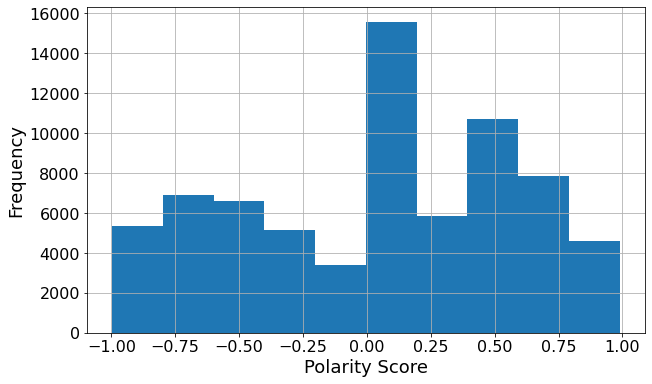

In [72]:
fig = plt.figure(figsize=(10, 6))
df['VComp'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [73]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,26921,37.39
1,Neutral,13186,18.31
2,Positive,31902,44.30


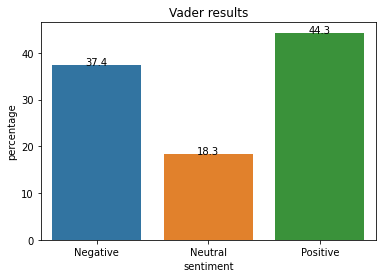

In [74]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('Vader results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

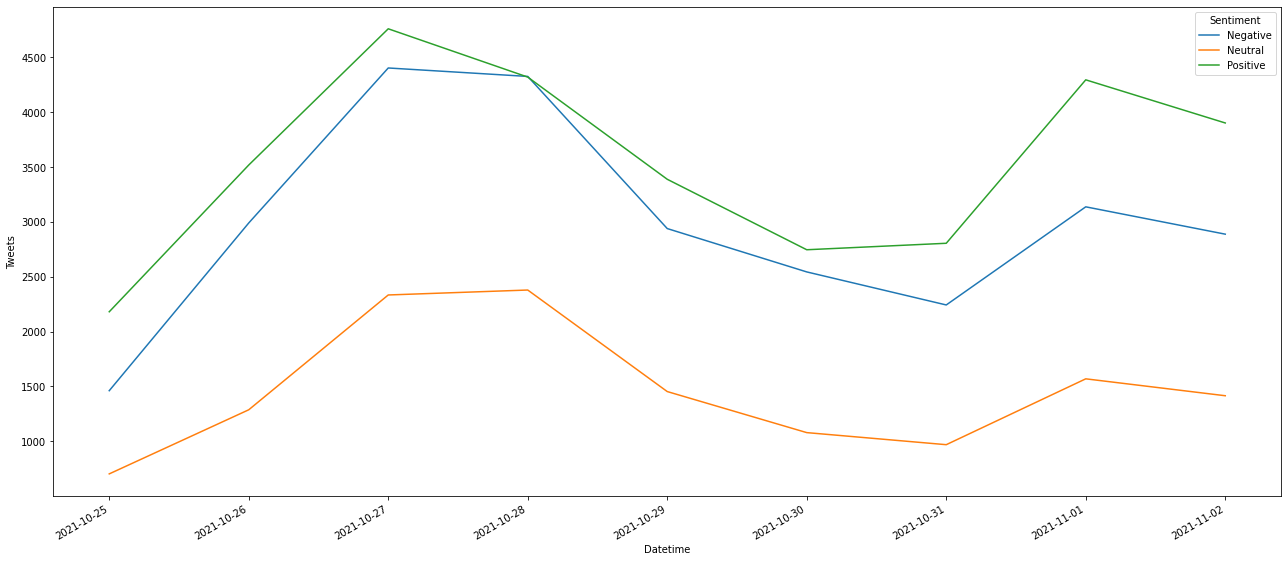

In [75]:
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()